### Testing

In [1]:
import pysimdeum
from pysimdeum.core import utils

In [2]:
house = pysimdeum.built_house(house_type='one_person')

/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:287: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s.iloc[start:end] = intensity
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6723566666666668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  discharge_pattern.loc[discharge_start:discharge_end - pd.Timedelta(seconds=1)] = discharge_rate # restrict range to not be inclusive of final timstamp as this would result in extra discharge
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '

In [3]:
house.appliances

[WcNewSave(name='WcNewSave'),
 Bathtub(name='Bathtub'),
 BathroomTap(name='BathroomTap'),
 Dishwasher(name='Dishwasher'),
 KitchenTap(name='KitchenTap'),
 OutsideTap(name='OutsideTap'),
 NormalShower(name='NormalShower'),
 WashingMachine(name='EndUse')]

In [4]:
consumption, discharge = house.simulate(duration='1 day', num_patterns=1, simulate_discharge=True, spillover=True)

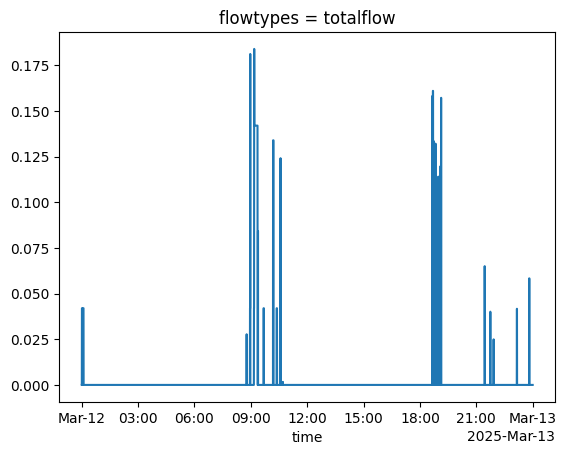

In [5]:
consumption.sum(['enduse', 'user']).sel(flowtypes='totalflow').mean(['patterns']).plot()

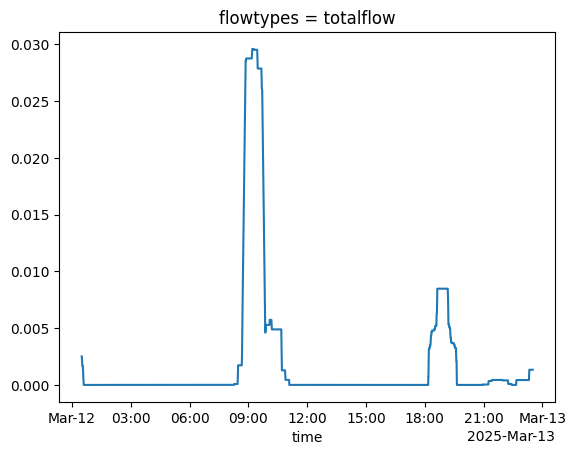

In [6]:
consumption.sum(['enduse', 'user']).sel(flowtypes='totalflow').mean(['patterns']).rolling(time=3600, center=True).mean().plot()

In [7]:
#consumption.sum(["user"]).sel(enduse="Dishwasher").sel(flowtypes="totalflow").plot()

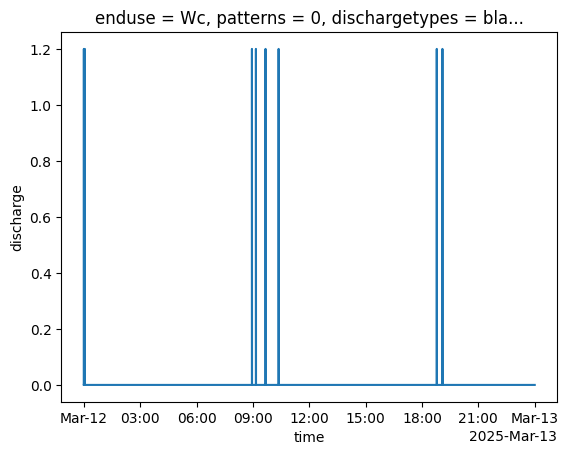

In [8]:
discharge.discharge.sum(["user"]).sel(enduse="Wc").sel(dischargetypes="blackwater").plot()

In [9]:
wm_discharge = discharge.discharge.sum(["user"]).sel(enduse="Wc").sel(dischargetypes="blackwater")
df = wm_discharge.to_dataframe(name='flow').reset_index()
dis = df[df['flow'] != 0]

In [10]:
wm_cons = consumption.sum(["user"]).sel(enduse="Wc").sel(flowtypes="totalflow")
df_c = wm_cons.to_dataframe(name='flow').reset_index()
cons = df_c[df_c['flow'] != 0]

In [11]:
dis

,time,patterns,enduse,dischargetypes,flow
8,2025-03-12 00:00:08,0,Wc,blackwater,1.2
9,2025-03-12 00:00:09,0,Wc,blackwater,1.2
10,2025-03-12 00:00:10,0,Wc,blackwater,1.2
186,2025-03-12 00:03:06,0,Wc,blackwater,1.2
187,2025-03-12 00:03:07,0,Wc,blackwater,1.2
188,2025-03-12 00:03:08,0,Wc,blackwater,1.2
189,2025-03-12 00:03:09,0,Wc,blackwater,1.2
190,2025-03-12 00:03:10,0,Wc,blackwater,1.2
191,2025-03-12 00:03:11,0,Wc,blackwater,1.2
32212,2025-03-12 08:56:52,0,Wc,blackwater,1.2


In [12]:
cons

,time,patterns,enduse,flowtypes,flow
11,2025-03-12 00:00:11,0,Wc,totalflow,0.042
12,2025-03-12 00:00:12,0,Wc,totalflow,0.042
13,2025-03-12 00:00:13,0,Wc,totalflow,0.042
14,2025-03-12 00:00:14,0,Wc,totalflow,0.042
15,2025-03-12 00:00:15,0,Wc,totalflow,0.042
...,...,...,...,...,...
68780,2025-03-12 19:06:20,0,Wc,totalflow,0.042
68781,2025-03-12 19:06:21,0,Wc,totalflow,0.042
68782,2025-03-12 19:06:22,0,Wc,totalflow,0.042
68783,2025-03-12 19:06:23,0,Wc,totalflow,0.042


In [13]:
dis['flow'].sum()

np.float64(32.4)

In [14]:
cons['flow'].sum()

np.float64(27.215999999999994)

### Nutrient

In [15]:
discharge

<xarray.Dataset> Size: 23MB
Dimensions:           (time: 86401, user: 2, enduse: 8, patterns: 1,
                       dischargetypes: 2, dim_0: 264)
Coordinates:
  * time              (time) datetime64[ns] 691kB 2025-03-12 ... 2025-03-13
  * user              (user) <U9 72B 'user_1' 'household'
  * enduse            (enduse) <U14 448B 'Wc' 'Bathtub' ... 'WashingMachine'
  * patterns          (patterns) int64 8B 0
  * dischargetypes    (dischargetypes) <U10 80B 'greywater' 'blackwater'
Dimensions without coordinates: dim_0
Data variables:
    discharge         (time, user, enduse, patterns, dischargetypes) float64 22MB ...
    discharge_events  (dim_0) object 2kB {'enduse': 'Wc', 'usage': 'urine', '...

In [16]:
discharge.discharge

<xarray.DataArray 'discharge' (time: 86401, user: 2, enduse: 8, patterns: 1,
                               dischargetypes: 2)> Size: 22MB
array([[[[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         ...,

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],
...
         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         ...,

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]]]])
Coordinates:
  * time            (time) datetime64[ns] 691kB 2025-03-12 ... 2025-03-13
  * user            (user) <U9 72B 'user_1' 'household'
  * enduse          (enduse) <U14 448B 'Wc' 'Bathtub' ... 'WashingMachine'
  * patterns        (patterns) int64 8B 0
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'

In [17]:
discharge.discharge_events[0]

<xarray.DataArray 'discharge_events' ()> Size: 8B
array({'enduse': 'Wc', 'usage': 'urine', 'start': 186, 'end': 192},
      dtype=object)

In [18]:
df = discharge.discharge.to_dataframe(name='flow').reset_index()
df['usage'] = None
df['event_label'] = None

nutrients = ['n', 'p', 'cod', 'bod5', 'ss', 'amm']
for nutrient in nutrients:
    df[nutrient] = 0.0

reference_start = df['time'].iloc[0]

#df = df[df['flow'] != 0]
df

,time,user,enduse,patterns,dischargetypes,flow,usage,event_label,n,p,cod,bod5,ss,amm
0,2025-03-12,user_1,Wc,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-03-12,user_1,Wc,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-03-12,user_1,Bathtub,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-03-12,user_1,Bathtub,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-03-12,user_1,BathroomTap,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764827,2025-03-13,household,OutsideTap,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764828,2025-03-13,household,Shower,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764829,2025-03-13,household,Shower,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764830,2025-03-13,household,WashingMachine,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
import pandas as pd

for event in discharge.discharge_events.values:
    start = event['start']
    end = event['end']
    usage = event['usage'].lower()
    enduse = event['enduse']
    print(start, end, usage, enduse)

    start_timestamp = reference_start + pd.Timedelta(seconds=start)
    end_timestamp = reference_start + pd.Timedelta(seconds=end)
    
    condition = (df['time'] >= start_timestamp) & (df['time'] <= end_timestamp) & (df['enduse'] == enduse) & (df['flow'] != 0)
    df.loc[condition, 'usage'] = usage
    df.loc[condition, 'event_label'] = f"{usage}_{start}_{end}"

    #for nutrient in nutrients:

df

186 192 urine Wc
32975 32978 urine Wc
68710 68713 urine Wc
32212 32215 urine Wc
8 11 urine Wc
37324 37327 urine Wc
67628 67631 urine Wc
34816 34819 urine Wc
38079 41350 washing_shaving BathroomTap
41350 41355 brushing_teeth BathroomTap
78262 78330 washing_shaving BathroomTap
78908 78928 brushing_teeth BathroomTap
83355 83485 washing_shaving BathroomTap
85710 86030 washing_shaving BathroomTap
67781 67970 consumption KitchenTap
38079 38143 dishes KitchenTap
67525 67548 consumption KitchenTap
67208 68497 other KitchenTap
68824 70670 dishes KitchenTap
68385 68388 consumption KitchenTap
33762 33798 washing_hands KitchenTap
68314 68338 other KitchenTap
68736 68889 other KitchenTap
77205 77214 consumption KitchenTap
68620 68636 washing_hands KitchenTap
36637 41140 dishes KitchenTap
31584 31611 washing_hands KitchenTap
67450 67498 dishes KitchenTap
67899 68733 other KitchenTap
32264 32840 consumption KitchenTap
67258 67930 dishes KitchenTap
68462 68567 dishes KitchenTap
33016 34645 shower Show

,time,user,enduse,patterns,dischargetypes,flow,usage,event_label,n,p,cod,bod5,ss,amm
0,2025-03-12,user_1,Wc,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-03-12,user_1,Wc,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-03-12,user_1,Bathtub,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-03-12,user_1,Bathtub,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-03-12,user_1,BathroomTap,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764827,2025-03-13,household,OutsideTap,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764828,2025-03-13,household,Shower,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764829,2025-03-13,household,Shower,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764830,2025-03-13,household,WashingMachine,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from scipy.stats import truncnorm
import numpy as np

def truncated_normal_dist_sampling(mean_value):
    if mean_value == 0:
        return 0
    std_dev = mean_value * 0.3   # Adjust the standard deviation as needed
    lower_bound = 0
    upper_bound = np.inf
    a, b = (lower_bound - mean_value) / std_dev, (upper_bound - mean_value) / std_dev
    # Sample from the truncated normal distribution
    nutrient_value = truncnorm.rvs(a, b, loc=mean_value, scale=std_dev)

    return nutrient_value

In [21]:
import toml
import numpy as np

toml_file_path = '/Users/val.ismaili/DAA/pysimdeum/pysimdeum/data/NL/ww_nutrients.toml'
nutrient_data = toml.load(toml_file_path)

unique_labels = df['event_label'].dropna().unique()
results = {}
nutrients = ['n', 'p', 'cod', 'bod5', 'ss', 'amm']

for nutrient in nutrients:
    df[nutrient] = 0.0

for label in unique_labels:
    label_rows = df[df['event_label'] == label]
    average_flow = label_rows['flow'].mean()
    total_flow = average_flow * len(label_rows)
    #results[label] = total_flow

    # Get the enduse and usage from the label
    enduse = label_rows['enduse'].iloc[0]
    usage = label_rows['usage'].iloc[0]

    for nutrient in nutrients:
        # Look up the nutrient value from the TOML data
        nutrient_value = truncated_normal_dist_sampling(nutrient_data[enduse][usage][nutrient])
        # Calculate the nutrient concentration
        df.loc[df['event_label'] == label, nutrient] = df['flow'] * nutrient_value

df


,time,user,enduse,patterns,dischargetypes,flow,usage,event_label,n,p,cod,bod5,ss,amm
0,2025-03-12,user_1,Wc,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-03-12,user_1,Wc,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-03-12,user_1,Bathtub,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-03-12,user_1,Bathtub,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-03-12,user_1,BathroomTap,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764827,2025-03-13,household,OutsideTap,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764828,2025-03-13,household,Shower,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764829,2025-03-13,household,Shower,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764830,2025-03-13,household,WashingMachine,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
import matplotlib.pyplot as plt

x = np.linspace(0, mean_value + 4 * std_dev, 1000)

# Calculate the PDF of the truncated normal distribution
pdf = truncnorm.pdf(x, a, b, loc=mean_value, scale=std_dev)

# Plot the PDF
plt.plot(x, pdf, label='Truncated Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Truncated Normal Distribution')
plt.legend()
plt.grid(True)

NameError: name 'mean_value' is not defined

In [ ]:
df.usage.unique()

In [ ]:
df.enduse.unique()

In [ ]:
discharge.discharge_events[0]

In [ ]:
for event in discharge.discharge_events.values:
    print(event)
    print(event['start'])

## Nutrient testing

In [23]:
discharge

<xarray.Dataset> Size: 23MB
Dimensions:           (time: 86401, user: 2, enduse: 8, patterns: 1,
                       dischargetypes: 2, dim_0: 264)
Coordinates:
  * time              (time) datetime64[ns] 691kB 2025-03-12 ... 2025-03-13
  * user              (user) <U9 72B 'user_1' 'household'
  * enduse            (enduse) <U14 448B 'Wc' 'Bathtub' ... 'WashingMachine'
  * patterns          (patterns) int64 8B 0
  * dischargetypes    (dischargetypes) <U10 80B 'greywater' 'blackwater'
Dimensions without coordinates: dim_0
Data variables:
    discharge         (time, user, enduse, patterns, dischargetypes) float64 22MB ...
    discharge_events  (dim_0) object 2kB {'enduse': 'Wc', 'usage': 'urine', '...

In [24]:
nutrient_data = utils.assign_discharge_nutrients(discharge)
nutrient_data

,time,user,enduse,patterns,dischargetypes,flow,usage,event_label,n,p,cod,bod5,ss,amm
0,2025-03-12,user_1,Wc,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-03-12,user_1,Wc,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-03-12,user_1,Bathtub,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-03-12,user_1,Bathtub,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-03-12,user_1,BathroomTap,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764827,2025-03-13,household,OutsideTap,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764828,2025-03-13,household,Shower,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764829,2025-03-13,household,Shower,0,blackwater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
2764830,2025-03-13,household,WashingMachine,0,greywater,0.0,None,None,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
discharge['discharge']

<xarray.DataArray 'discharge' (time: 86401, user: 2, enduse: 7, patterns: 1,
                               dischargetypes: 2)> Size: 19MB
array([[[[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         ...,

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],
...
         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         ...,

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]]]])
Coordinates:
  * time            (time) datetime64[ns] 691kB 2025-03-12 ... 2025-03-13
  * user            (user) <U9 72B 'user_1' 'household'
  * enduse          (enduse) <U14 392B 'Wc' 'Bathtub' ... 'WashingMachine'
  * patterns        (patterns) int64 8B 0
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'